In [1]:
tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [86]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("ignore")

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Import Candy Dataset

In [87]:
candy = pd.read_csv("candy_production.csv", index_col = "date", parse_dates = ["date"])
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


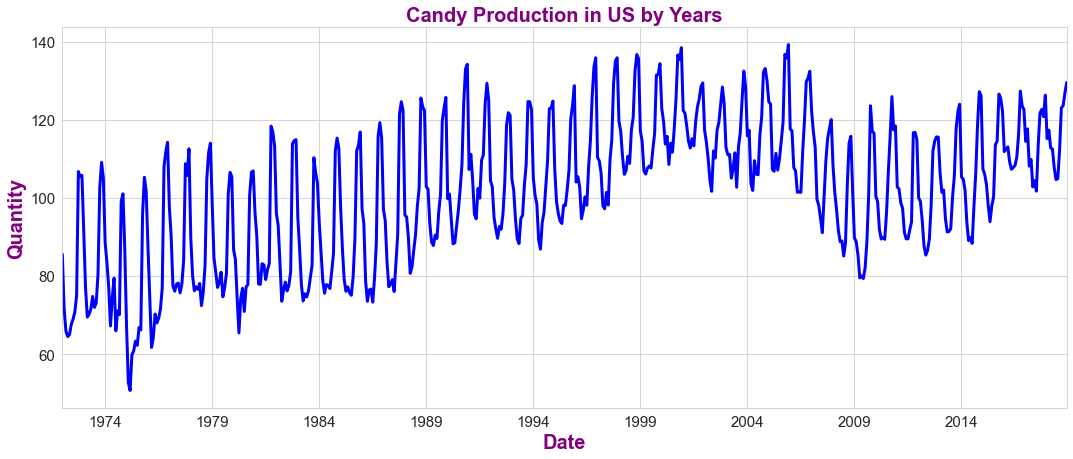

In [88]:
candy.plot(figsize = (18, 7), color = "blue", linewidth = 3, legend = None)
plt.title("Candy Production in US by Years", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Quantity", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Train-Test Splits

In [89]:
train = candy.loc[:"2006"]
test = candy.loc["2007":]

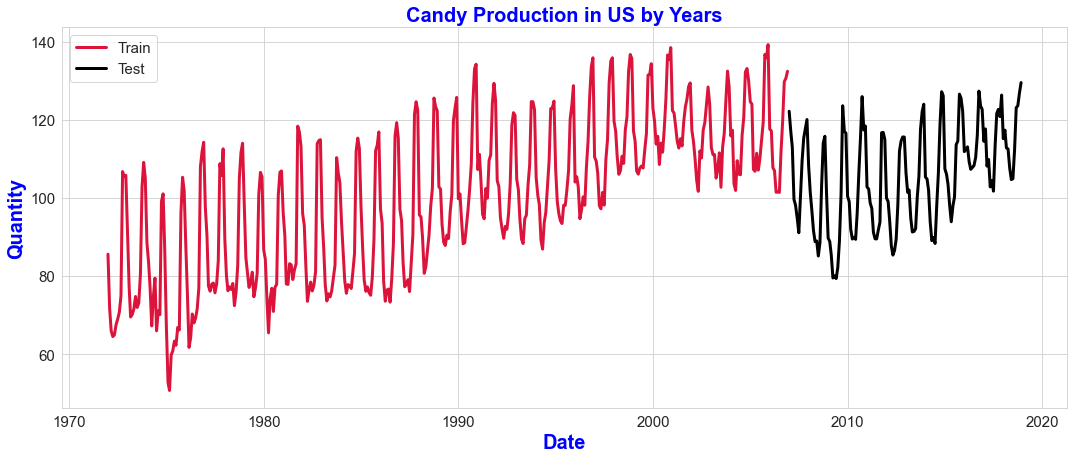

In [90]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = train.index, y = "IPG3113N", data = train, color = "crimson", linewidth = 3, label = "Train")
sns.lineplot(x = test.index, y = "IPG3113N", data = test, color = "black", linewidth = 3, label = "Test")
plt.title("Candy Production in US by Years", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Quantity", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show()

### Import Amazon Data

In [91]:
amazon = pd.read_csv("amazon_close.csv", index_col = "date", parse_dates = ["date"])
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


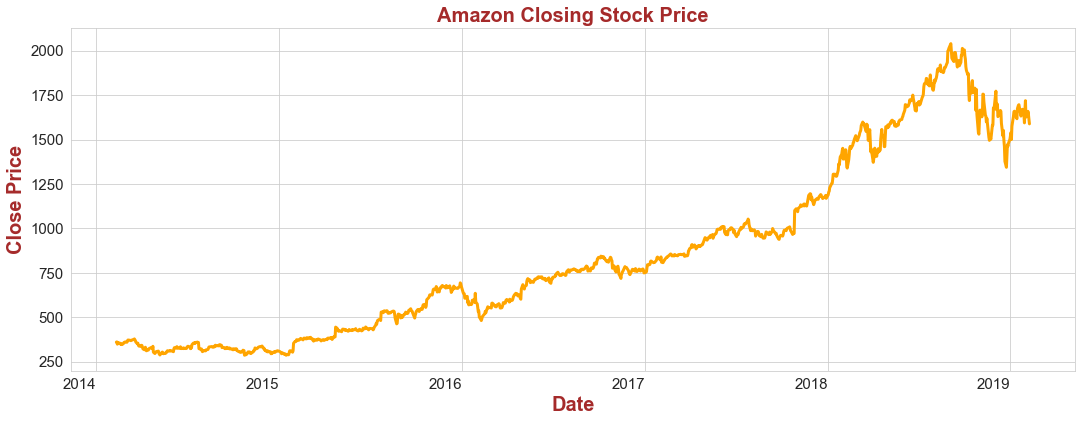

In [92]:
amazon.plot(figsize = (18, 7), color = "orange", linewidth = 3, legend = None)
plt.title("Amazon Closing Stock Price", color = "brown", size = 20, weight = "bold")
plt.xlabel("Date", color = "brown", size = 20, weight = "bold")
plt.ylabel("Close Price", color = "brown", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Applying the Adfuller Test (Test for trend non-stationary)

**<code>Null Hypothesis:</code>**      Amazon Time Series has Trend <p>
**<code>Alternate Hypothesis:</code>** Amazon Time Series is stationary

In [93]:
results = adfuller(amazon["close"])

In [94]:
pd.DataFrame({"Values": results,
              "Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"]})

,Values,Statistics
0,-1.344669,Test Statistics
1,0.608497,P-Value
2,23,Used Lag
3,1235,Observations
4,"{'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}",Critical Values
5,10782.877784,icbest


**Result**

In [95]:
if results[1] > 0.05:
    print("Accept Null Hypothesis: Amazon Time Series has Trend")
else:
    print("Accept Alternate Hypothesis: Amazon Time Series is Stationary")

Accept Null Hypothesis: Amazon Time Series has Trend


### Import Earthquake Data 

In [96]:
eq = pd.read_csv("earthquakes.csv", index_col = "Year", parse_dates = ["Year"])
del eq["date"]
eq.head()

,earthquakes_per_year
Year,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


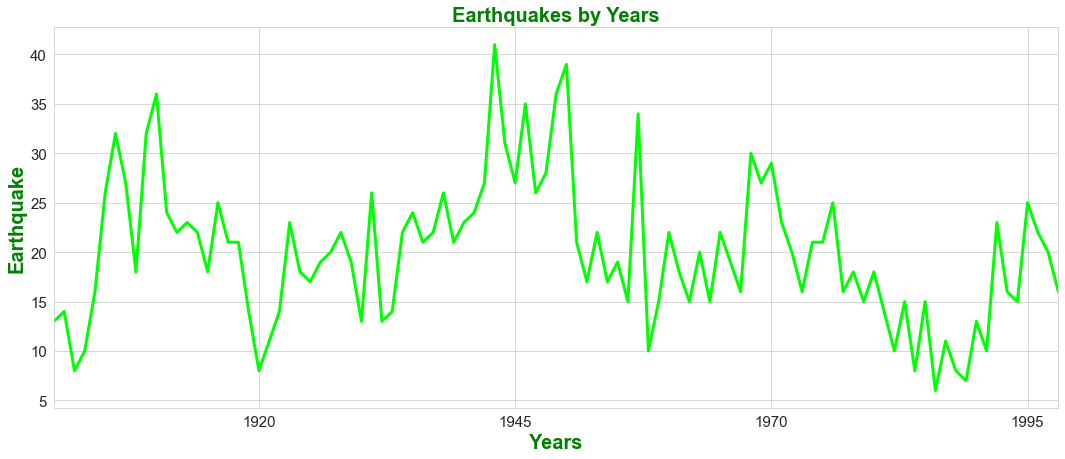

In [97]:
eq.plot(figsize = (18, 7), color = "lime", linewidth = 3, legend = None)
plt.title("Earthquakes by Years", color = "green", size = 20, weight = "bold")
plt.xlabel("Years", color = "green", size = 20, weight = "bold")
plt.ylabel("Earthquake", color = "green", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Augmented Dicky-Fuller Test <p>
**<code>Null Hypothesis:</code>**   Earthquake Time Series has Trend <p>
**<code>Alternate Hypothesis:</code>** Earthquake Time Series is Stationary

In [98]:
eq_result = adfuller(eq["earthquakes_per_year"])
pd.DataFrame({"Values": eq_result,
              "Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"]})

,Values,Statistics
0,-3.183192,Test Statistics
1,0.020978,P-Value
2,2,Used Lag
3,96,Observations
4,"{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}",Critical Values
5,549.068147,icbest


In [99]:
if eq_result[1] > 0.05:
    print("Accept Null Hypothesis, Earthquake Time Series has Trend")
else:
    print("Accept Alternate Hypothesis, Earthquake Time Series in Stationary")

Accept Alternate Hypothesis, Earthquake Time Series in Stationary


### Import Population Data

In [100]:
p = pd.read_csv("population.csv", index_col = "date", parse_dates = ["date"])
p.head()

,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


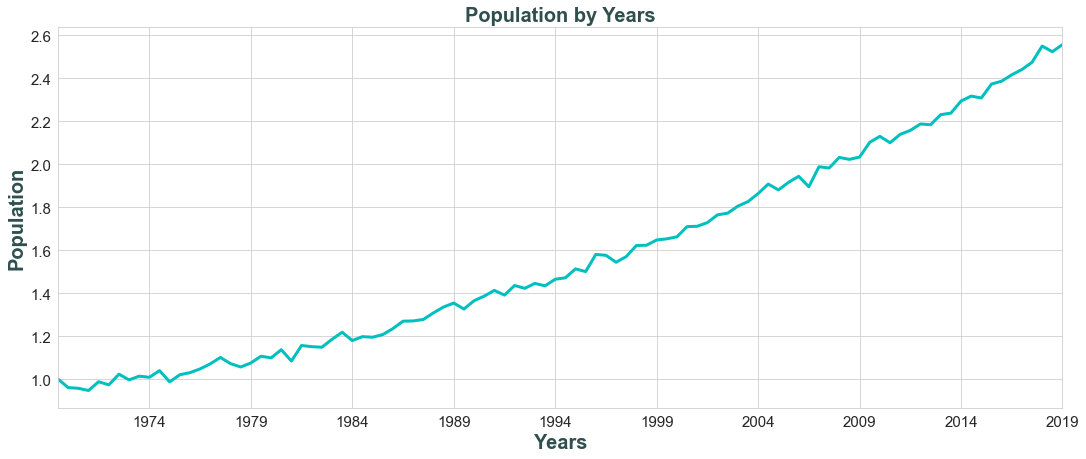

In [101]:
p.plot(figsize = (18, 7), color = "c", linewidth = 3, legend = None)
plt.title("Population by Years", color = "darkslategray", size = 20, weight = "bold")
plt.xlabel("Years", color = "darkslategray", size = 20, weight = "bold")
plt.ylabel("Population", color = "darkslategray", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Augmented Dicky-Fuller Test <p>
**<code>Null Hypothesis:</code>**   Population Time Series has Trend <p>
**<code>Alternate Hypothesis:</code>** Population Time Series is Stationary

In [102]:
p_result = adfuller(p["city_population"])
pd.DataFrame({"Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"],
              "Values": p_result})

,Statistics,Values
0,Test Statistics,5.297691
1,P-Value,1.0
2,Used Lag,7
3,Observations,92
4,Critical Values,"{'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}"
5,icbest,-408.538983


In [103]:
if p_result[1] > 0.05:
    print("Accept Null Hypothesis: Poulation Time Series has Trend")
else:
    print("Accept Alternate Hypothesis: Population Time Series is Stationary")

Accept Null Hypothesis: Poulation Time Series has Trend


### Calculate First Difference (Population)

In [104]:
p["difference"] = p["city_population"].diff().dropna()
p = p.dropna()
p.head()

,city_population,difference
date,,
1970-03-31,0.960285,-0.039715
1970-09-30,0.957167,-0.003118
1971-03-31,0.946928,-0.010239
1971-09-30,0.987741,0.040813
1972-03-31,0.973202,-0.014539


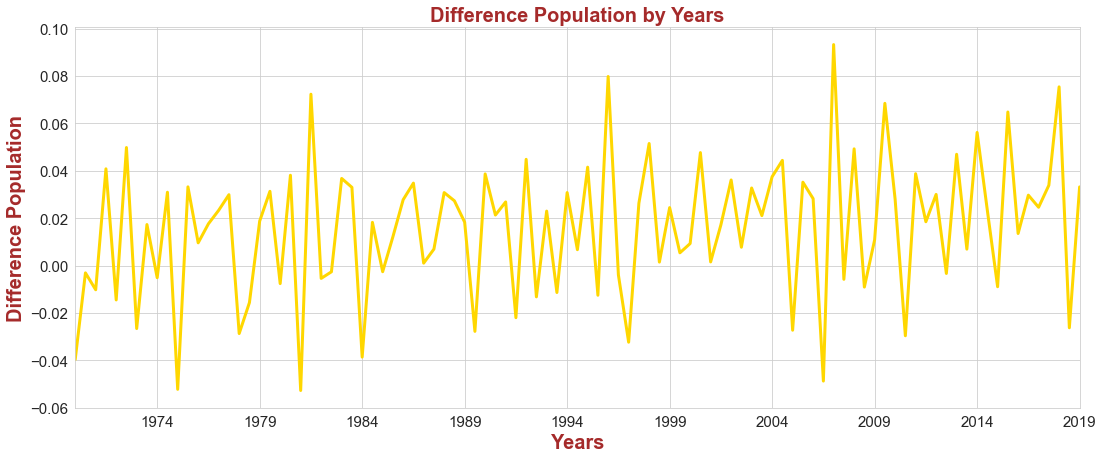

In [105]:
p["difference"].plot(figsize = (18, 7), color = "gold", linewidth = 3, legend = None)
plt.title("Difference Population by Years", color = "brown", size = 20, weight = "bold")
plt.xlabel("Years", color = "brown", size = 20, weight = "bold")
plt.ylabel("Difference Population", color = "brown", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

**Run ADF test on the differenced time series**

In [106]:
ps_result = adfuller(p["difference"])
pd.DataFrame({"Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"],
              "Values": ps_result})

,Statistics,Values
0,Test Statistics,-0.814629
1,P-Value,0.814787
2,Used Lag,11
3,Observations,87
4,Critical Values,"{'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}"
5,icbest,-387.138246


In [107]:
if ps_result[1] > 0.05:
    print("Accet Null Hypothesis, First Difference Population Time Series has Trend")
else:
    print("Accept Alternate Hypothesis, First Difference Time Series is Stationary")

Accet Null Hypothesis, First Difference Population Time Series has Trend


### Calculate Second Difference (Population)

In [108]:
p["second_difference"] = p["difference"].diff()
p = p.dropna()
p.head()

,city_population,difference,second_difference
date,,,
1970-09-30,0.957167,-0.003118,0.036597
1971-03-31,0.946928,-0.010239,-0.007121
1971-09-30,0.987741,0.040813,0.051052
1972-03-31,0.973202,-0.014539,-0.055352
1972-09-30,1.023011,0.049809,0.064348


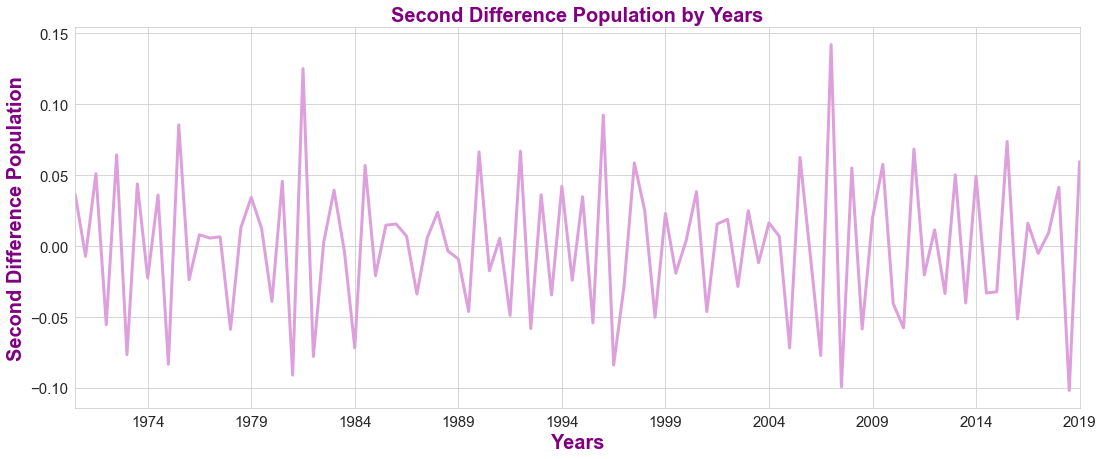

In [109]:
p["second_difference"].plot(figsize = (18, 7), color = "plum", linewidth = 3, legend = None)
plt.title("Second Difference Population by Years", color = "purple", size = 20, weight = "bold")
plt.xlabel("Years", color = "purple", size = 20, weight = "bold")
plt.ylabel("Second Difference Population", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

In [110]:
ps2_result = adfuller(p["second_difference"])
pd.DataFrame({"Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"],
              "Values": ps2_result})

,Statistics,Values
0,Test Statistics,-6.433641
1,P-Value,0.0
2,Used Lag,10
3,Observations,87
4,Critical Values,"{'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}"
5,icbest,-382.711213


In [111]:
if ps2_result[1] > 0.05:
    print("Accept Null Hypothesis, Second Difference Population Time Series has Trend")
else:
    print("Accept Alternate Hypothesis, Second Difference Population Time Series is Stationary")

Accept Alternate Hypothesis, Second Difference Population Time Series is Stationary


### Log Transformation Amazon

In [112]:
amazon_log = np.log(amazon["close"] / amazon["close"].shift(1)).dropna()
log_result = adfuller(amazon_log)
pd.DataFrame({"Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"],
              "Values": log_result})

,Statistics,Values
0,Test Statistics,-34.915749
1,P-Value,0.0
2,Used Lag,0
3,Observations,1257
4,Critical Values,"{'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}"
5,icbest,-6245.723148


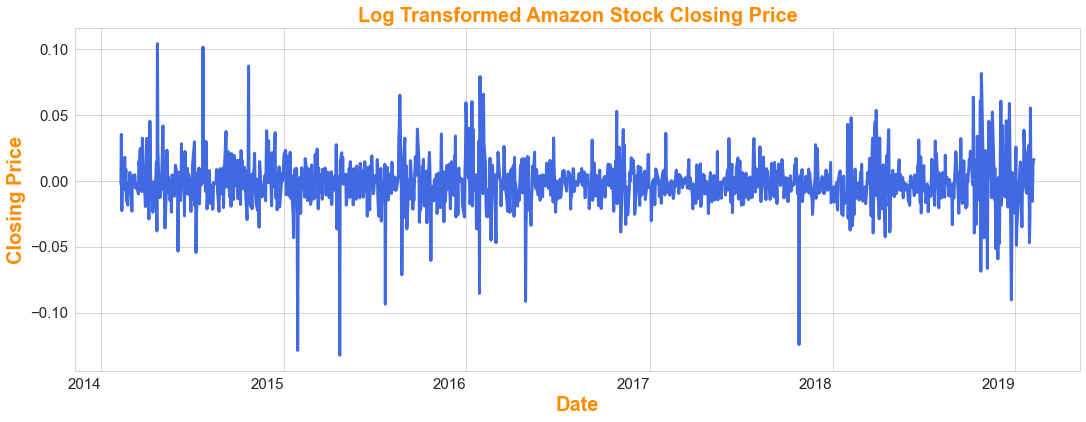

In [113]:
amazon_log.plot(figsize = (18, 7), color = "royalblue", linewidth = 3, legend = None)
plt.title("Log Transformed Amazon Stock Closing Price", color = "darkorange", size = 20, weight = "bold")
plt.xlabel("Date", color = "darkorange", size = 20, weight = "bold")
plt.ylabel("Closing Price", color = "darkorange", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

In [114]:
if log_result[1] > 0.05:
    print("Accept Null Hypothesis, Log Transformed Amazon Time Series has Trend")
else:
    print("Accept Alternate Hypothesis, Log Transformed Amazon Time Series is Stationary")

Accept Alternate Hypothesis, Log Transformed Amazon Time Series is Stationary


### Fitting an ARMA model

In [115]:
model = ARMA(eq, order = (3, 1))

# Fit the model
results = model.fit()

# Print model fit summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                               
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Sat, 30 Apr 2022   AIC                            643.345
Time:                          23:29:36   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.164      -0.236       1.394
ar.L2.earthquakes_per_year     0.0251      0.208      0.121      0.904      -0.382       0.433
ar.L3.earthquakes_per_year     0.1519      0.131      1.162      0.245      -0.104       0.408
ma.L1.earthquakes_per_year    -0.1720      0.416     -0.413      0.679      -0.988       0.644
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2047           -0.0000j            1.2047           -0.0000
AR.2           -0.6850           -2.2352j            2.3378           -0.2973
AR.3           -0.6850           +2.2352j            2.3378            0.2973
MA.1            5.8138           +0.0000j            5.8138            0.0000
-----------------------------------------------------------------------------
"""

### Forecasting using SARIMAX

In [116]:
amazon = amazon.sort_index()

In [117]:
model = SARIMAX(amazon, order = (3,1,3), trend = "c")

results = model.fit()

# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1475.616373
2018-12-28    1462.355639
2018-12-31    1471.247555
2019-01-02    1497.288023
2019-01-03    1538.355049
2019-01-04    1506.200417
2019-01-07    1585.193809
2019-01-08    1629.194392
2019-01-09    1652.303637
2019-01-10    1651.009527
2019-01-11    1657.053344
2019-01-14    1645.729822
2019-01-15    1627.797957
2019-01-16    1678.062315
2019-01-17    1678.218885
2019-01-18    1685.108075
2019-01-22    1692.719300
2019-01-23    1637.520522
2019-01-24    1652.769357
2019-01-25    1659.885483
2019-01-28    1667.953460
2019-01-29    1626.641819
2019-01-30    1590.636766
2019-01-31    1675.117186
2019-02-01    1726.823739
2019-02-04    1630.851092
2019-02-05    1637.011485
2019-02-06    1651.101660
2019-02-07    1635.366090
2019-02-08    1612.508342
Name: predicted_mean, dtype: float64


### Plot Forecasting

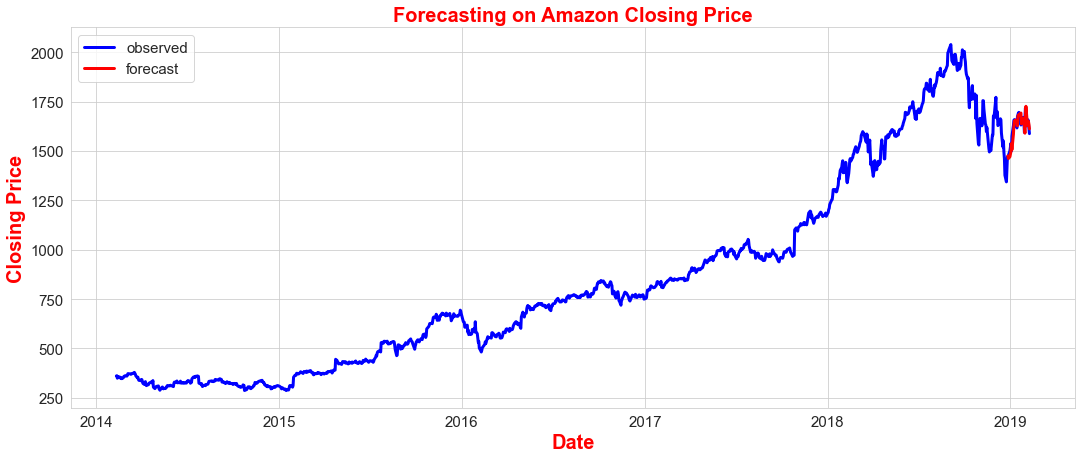

In [118]:
plt.figure(figsize = (18, 7))
plt.plot(amazon.index, amazon, color = "blue", linewidth = 3, label = "observed")
plt.plot(mean_forecast.index, mean_forecast, color = "red", linewidth = 3, label = "forecast")
plt.title("Forecasting on Amazon Closing Price", color = "red", size = 20, weight = "bold")
plt.xlabel("Date", color = "red", size = 20, weight = "bold")
plt.ylabel("Closing Price", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show()

### Generating Dynamic Forecasts

In [119]:
d_model = SARIMAX(amazon, order = (3, 1, 3), trend = "c")

result = d_model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5527.308
Date:                Sat, 30 Apr 2022   AIC                          11070.616
Time:                        23:29:43   BIC                          11111.714
Sample:                             0   HQIC                         11086.061
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4312      0.992      1.443      0.149      -0.513       3.376
ar.L1          0.1379      0.027      5.168      0.000       0.086       0.190
ar.L2          0.0121      0.029      0.423      0.6

In [120]:
# Generate predictions
dynamic_forecast = result.get_prediction(start = -30, dynamic = True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, "lower close"]
upper_limits = confidence_intervals.loc[:, "upper close"]

print(mean_forecast)

date
2018-12-27    1475.616373
2018-12-28    1476.429341
2018-12-31    1468.891308
2019-01-02    1464.962491
2019-01-03    1465.014626
2019-01-04    1473.327027
2019-01-07    1479.512240
2019-01-08    1481.848517
2019-01-09    1476.043921
2019-01-10    1471.023764
2019-01-11    1469.547649
2019-01-14    1476.044552
2019-01-15    1482.963111
2019-01-16    1486.781832
2019-01-17    1482.857449
2019-01-18    1477.441024
2019-01-22    1474.571778
2019-01-23    1479.145425
2019-01-24    1486.145888
2019-01-25    1491.231877
2019-01-28    1489.249127
2019-01-29    1484.040463
2019-01-30    1480.059673
2019-01-31    1482.699775
2019-02-01    1489.229500
2019-02-04    1495.247889
2019-02-05    1495.163389
2019-02-06    1490.659901
2019-02-07    1485.943095
2019-02-08    1486.747258
Name: predicted_mean, dtype: float64


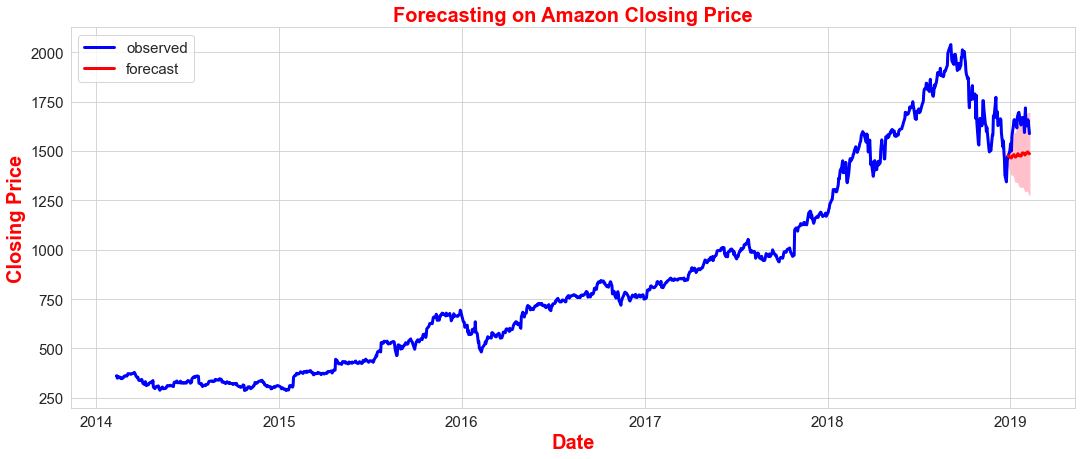

In [121]:
plt.figure(figsize = (18, 7))
plt.plot(amazon.index, amazon, color = "blue", linewidth = 3, label = "observed")
plt.plot(mean_forecast.index, mean_forecast, color = "red", linewidth = 3, label = "forecast")
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.title("Forecasting on Amazon Closing Price", color = "red", size = 20, weight = "bold")
plt.xlabel("Date", color = "red", size = 20, weight = "bold")
plt.ylabel("Closing Price", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show()

### Differencing and Fitting ARMA

In [122]:
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order = (2, 0, 2))

# Fit Model
arma_results = arma.fit()

arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.039
Date:                Sat, 30 Apr 2022   AIC                          11072.079
Time:                        23:29:45   BIC                          11097.765
Sample:                             0   HQIC                         11081.732
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0773      0.004    268.781      0.000       1.069       1.085
ar.L2         -0.9953      0.003   -287.152      0.000      -1.002      -0.988
ma.L1         -1.0918      0.006   -183.342      0.000      -1.103      -1.080
ma.L2          0.9951      0.007    147.594      0.000       0.982       1.008
sigma2       384.0536      6.571     58.446      0.000     371.174     396.933
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):              6863.20
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):              15.47   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Unrolling ARMA forecast**

In [123]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps = 10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

arma_value_forecast

1258    1593.568663
1259    1601.872937
1260    1605.495494
1261    1601.132958
1262    1592.827919
1263    1588.223075
1264    1591.528187
1265    1599.671739
1266    1605.155040
1267    1602.956985
Name: predicted_mean, dtype: float64

### Fitting an ARIMA model

In [124]:
arima = SARIMAX(amazon, order = (2, 1, 2))

arima_results = arima.fit()

arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5531.418
Date:                Sat, 30 Apr 2022   AIC                          11072.835
Time:                        23:29:47   BIC                          11098.522
Sample:                             0   HQIC                         11082.489
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0703      0.011     94.964      0.000       1.048       1.092
ar.L2         -0.9768      0.011    -88.965      0.000      -0.998      -0.955
ma.L1         -1.0941      0.012    -88.940      0.000      -1.118      -1.070
ma.L2          0.9784      0.013     73.606      0.000       0.952       1.004
sigma2       385.3054      6.112     63.045      0.000     373.327     397.284
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              6834.97
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):              15.46   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
arima_forecast = arima_results.get_forecast(steps = 10).predicted_mean
arima_forecast

1259    1594.880181
1260    1602.141305
1261    1603.407084
1262    1597.669222
1263    1590.291751
1264    1588.000538
1265    1592.754554
1266    1600.080675
1267    1603.277940
1268    1599.543805
Name: predicted_mean, dtype: float64

### Auto Correlation and Partial Auto Correlation

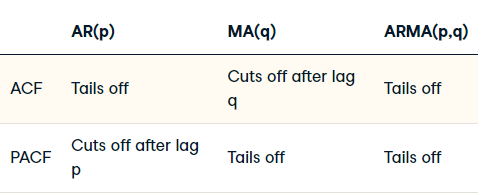

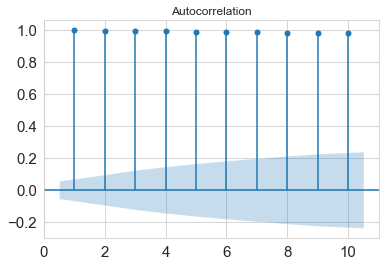

In [126]:
plot_acf(amazon, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

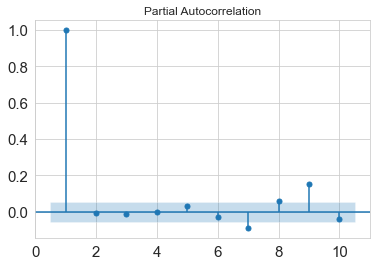

In [127]:
plot_pacf(amazon, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### AR or MA

In [128]:
data = pd.read_csv("dataset.csv", index_col = "Date")
data.index = pd.to_datetime(data.index)
data.head()

,y
Date,
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023


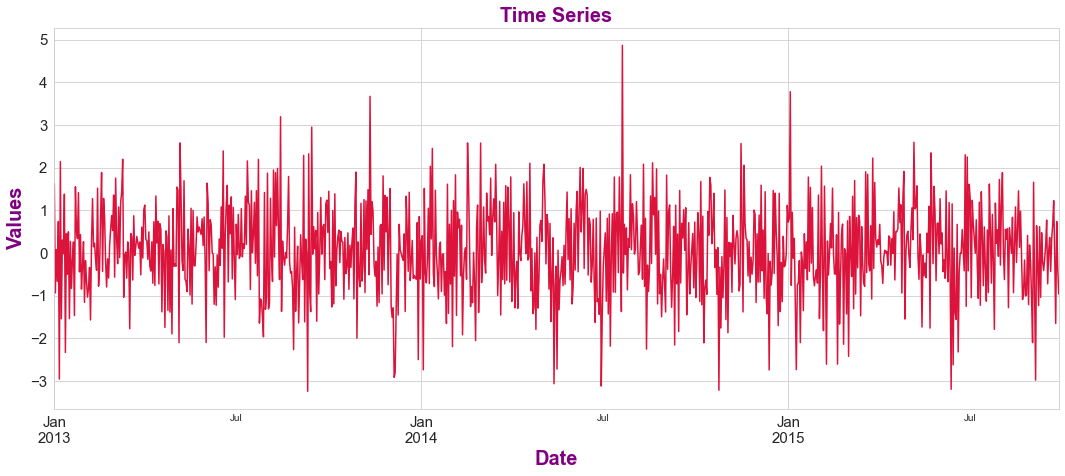

In [129]:
data.plot(figsize = (18, 7), legend = None, color = "crimson")
plt.title("Time Series", size = 20, color = "purple", weight = "bold")
plt.xlabel("Date", size = 20, color = "purple", weight = "bold")
plt.ylabel("Values", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

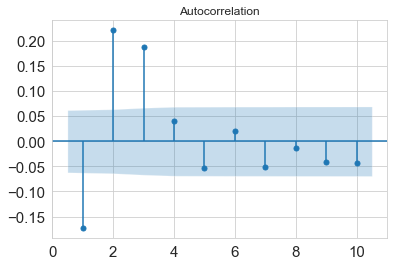

In [130]:
plot_acf(data, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

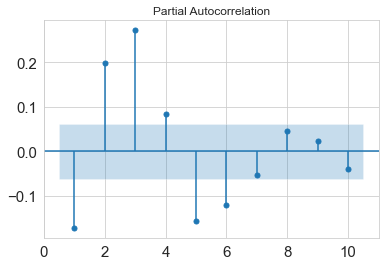

In [131]:
plot_pacf(data, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Earthquake Autocorrelation

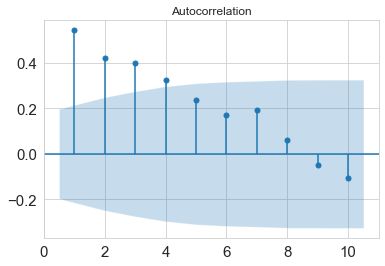

In [132]:
plot_acf(eq, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Earthquake Partial Autocorrelation

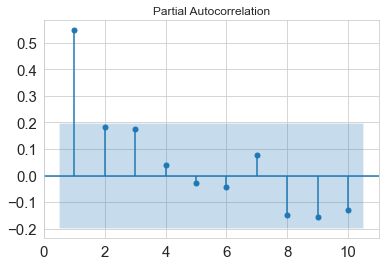

In [133]:
plot_pacf(eq, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Order of earthquakes

In [134]:
model = SARIMAX(eq, order = (1, 0, 0))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Sat, 30 Apr 2022   AIC                            666.646
Time:                          23:29:51   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Searching for AIC and BIC

In [135]:
order_aic_bic = []
for p in range(3):
    for q in range(3):
        model = SARIMAX(eq, order = (p, 0, q))
        results = model.fit()
        order_aic_bic.append((p, q, results.aic.round(2), results.bic.round(2)))

order_df = pd.DataFrame(order_aic_bic, columns = ["p", "q", "aic", "bic"])
order_df.sort_values("aic")

,p,q,aic,bic
4,1,1,647.13,654.92
5,1,2,648.74,659.12
7,2,1,648.84,659.22
8,2,2,648.85,661.83
6,2,0,656.03,663.81
3,1,0,666.65,671.84
2,0,2,761.07,768.85
1,0,1,799.67,804.86
0,0,0,888.43,891.02


### Fit Model having low aic

In [136]:
model = SARIMAX(eq, order = (1, 0, 1))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Sat, 30 Apr 2022   AIC                            647.132
Time:                          23:29:52   BIC                            654.918
Sample:                      01-01-1900   HQIC                           650.282
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980      7.434      0.000      27.264      46.787
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.83   Prob(JB):                         0.25
Heteroskedasticity (H):               0.64   Skew:                             0.38
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Mean absolute error

In [137]:
model = SARIMAX(eq, order = (1, 0, 1))

results = model.fit()

mae = np.mean(np.abs(results.resid))

print(mae)

4.755625670670786


### Diagnostic Summary Statistics

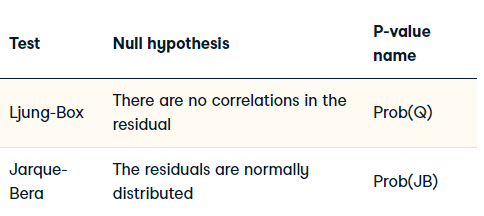

In [138]:
model = SARIMAX(data, order = (3, 0, 1))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1421.678
Date:                Sat, 30 Apr 2022   AIC                           2853.356
Time:                        23:29:53   BIC                           2877.895
Sample:                    01-01-2013   HQIC                          2862.682
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0719      0.110     -0.653      0.514      -0.288       0.144
ar.L2          0.2542      0.034      7.573      0.000       0.188       0.320
ar.L3          0.2528      0.039      6.557      0.000       0.177       0.328
ma.L1         -0.1302      0.112     -1.158      0.247      -0.351       0.090
sigma2         1.0051      0.042     23.701      0.000       0.922       1.088
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.29
Prob(Q):                              0.83   Prob(JB):                         0.04
Heteroskedasticity (H):               1.01   Skew:                            -0.09
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot Diagnostics

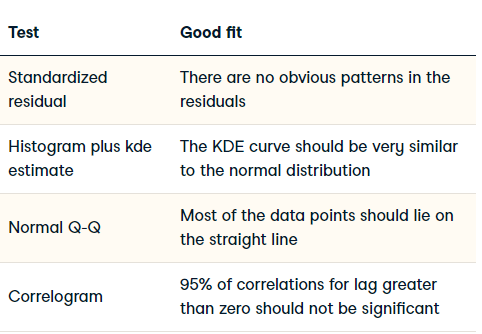

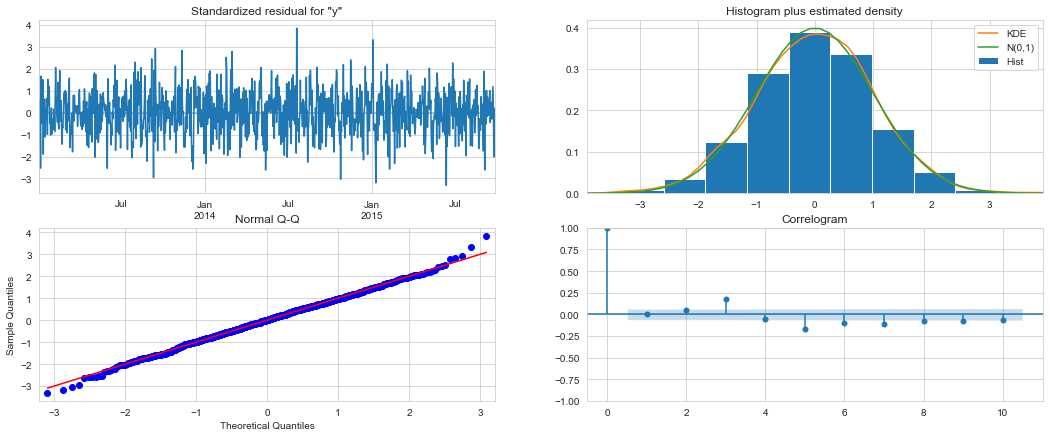

In [139]:
model = SARIMAX(data, order = (1, 1, 1))

results = model.fit()

results.plot_diagnostics(figsize = (18, 7))
plt.show()

### Identification

**Stationary**

In [140]:
saving = pd.read_csv("savings.csv", index_col = "date", parse_dates = ["date"])
saving.head()

,saving
date,
1955-01-01,4.9
1955-04-01,5.2
1955-07-01,5.7
1955-10-01,5.7
1956-01-01,6.2


**Plot Time Series**

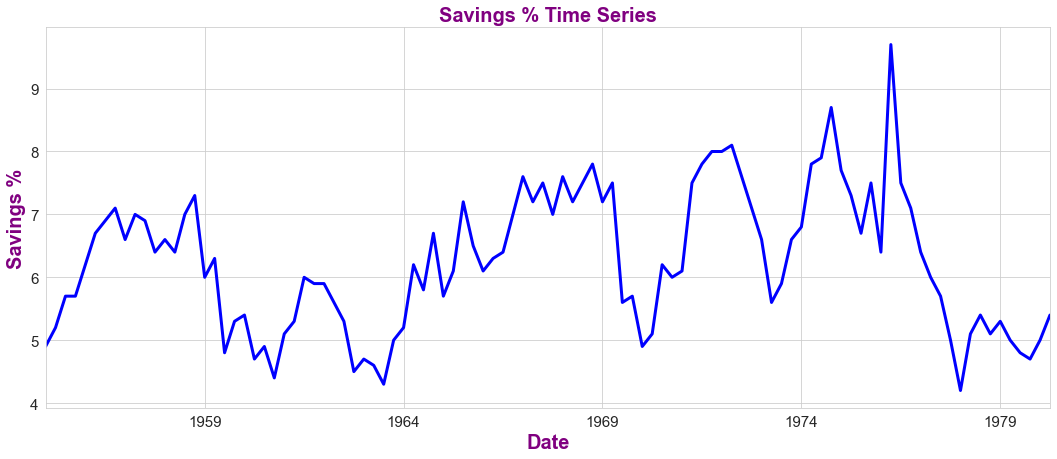

In [141]:
saving.plot(figsize = (18, 7), color = "blue", linewidth = 3, legend = None)
plt.title("Savings % Time Series", color = "purple", size = 20, weight = "bold")
plt.xlabel("Date", color = "purple", size = 20, weight = "bold")
plt.ylabel("Savings %", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

**<code>Dicky-Fuller test</code>**

In [142]:
result = adfuller(saving)
pd.DataFrame({"Statistics": ["Test Statistics", "P-Value", "Used Lag", "Observations", "Critical Values", "icbest"],
              "Values": result})

,Statistics,Values
0,Test Statistics,-3.185899
1,P-Value,0.020816
2,Used Lag,2
3,Observations,99
4,Critical Values,"{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}"
5,icbest,188.168666


In [143]:
if result[1] > 0.05:
    print("Savings % Time Series has Trend")
else:
    print("Savings % Time Series is Stationary")

Savings % Time Series is Stationary


### Identification II

**Model Order?**

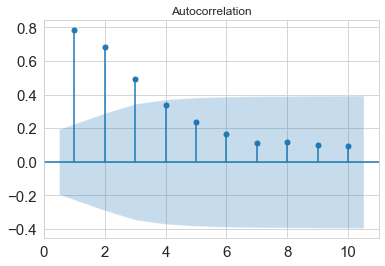

In [144]:
plot_acf(saving, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

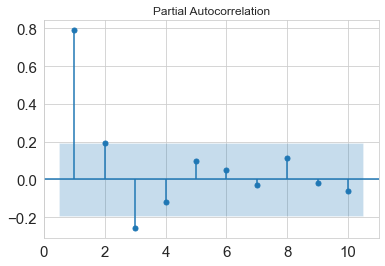

In [145]:
plot_pacf(saving, lags = 10, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Estimation

In [146]:
aic_bic = []
for p in range(4):
    for q in range(4):
        model = SARIMAX(saving, order = (p, 0, q), trend = "c")
        results = model.fit()
        aic_bic.append((p, q, results.aic.round(2), results.bic.round(2)))

order_df = pd.DataFrame(aic_bic, columns = ["p", "q", "aic", "bic"])
order_df.sort_values("aic")

,p,q,aic,bic
6,1,2,207.65,220.78
12,3,0,209.54,222.67
7,1,3,209.57,225.32
10,2,2,209.58,225.33
13,3,1,210.82,226.57
14,3,2,211.46,229.83
11,2,3,211.58,229.95
9,2,1,213.43,226.56
15,3,3,213.54,234.54
8,2,0,213.97,224.47


### Diagnostics

In [147]:
model = SARIMAX(saving, order = (1, 0, 2), trend = "c")

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 saving   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Sat, 30 Apr 2022   AIC                            207.653
Time:                        23:30:01   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.710      -0.338       0.230
ma.L2          0.3680      0.097      3.812      0.000       0.179       0.557
sigma2         0.4012      0.043      9.265      0.000       0.316       0.486
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                55.13
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                             0.82
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

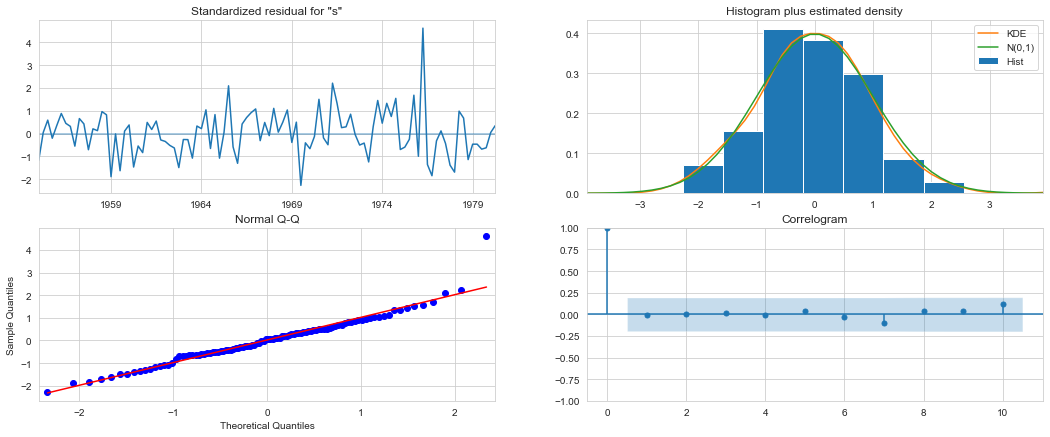

In [148]:
results.plot_diagnostics(figsize = (18, 7))
plt.show()

### Seasonal Decomposition

In [149]:
mp = pd.read_csv("milk_production.csv", index_col = "date", parse_dates = ["date"])
mp.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


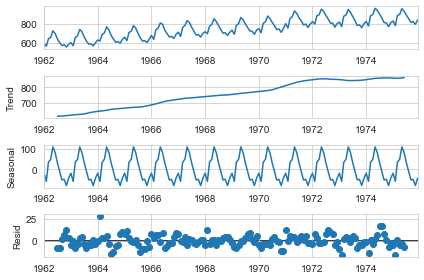

In [150]:
# Perform additive decomposition
decomp = seasonal_decompose(mp, period = 12)
decomp.plot()
plt.show()

In [151]:
wc = pd.read_csv("water_consumers.csv", index_col = "Date", parse_dates = ["Date"])
wc.head()

,water_consumers
Date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


**Seasonal ACF and PACF**

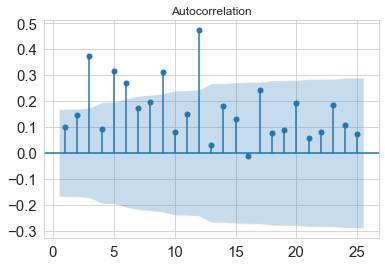

In [152]:
plot_acf(wc["water_consumers"], lags = 25, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

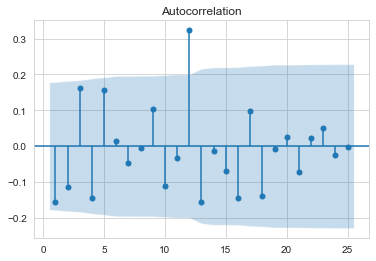

In [153]:
# Subtract the rolling mean
water_2 = wc - wc.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

plot_acf(water_2["water_consumers"], lags = 25, zero = False)
plt.show()

### Fitting SARIMA Models

In [154]:
df1 = pd.read_csv("df1.csv", index_col = "Date", parse_dates = ["Date"])
df1.head()

,Y
Date,
2013-01-01,-259.864025
2013-01-02,695.803849
2013-01-03,25.506578
2013-01-04,-474.447067
2013-01-05,450.390057


In [155]:
model = SARIMAX(df1, order = (1, 0, 0), seasonal_order = (1, 1, 0, 7))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.320
Date:                           Sat, 30 Apr 2022   AIC                           1118.640
Time:                                   23:30:06   BIC                           1125.896
Sample:                               01-01-2013   HQIC                          1121.555
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1025      0.103      0.995      0.320      -0.099       0.304
ar.S.L7        0.2811      0.105      2.690      0.007       0.076       0.486
sigma2      3.865e+04   7259.157      5.325      0.000    2.44e+04    5.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.97   Prob(JB):                         0.43
Heteroskedasticity (H):               1.34   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
df2 = pd.read_csv("df2.csv", index_col = "Date", parse_dates = ["Date"])
df2.head()

,Y
Date,
2013-01-01,-1664.274145
2013-01-02,-1797.404781
2013-01-03,-2108.942905
2013-01-04,-2611.186919
2013-01-05,-3025.791912


In [157]:
model = SARIMAX(df2, order = (2, 1, 1), seasonal_order = (1, 0, 0, 4))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Sat, 30 Apr 2022   AIC                           1130.679
Time:                                    23:30:06   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
Prob(Q):                              1.00   Prob(JB):                         0.62
Heteroskedasticity (H):               0.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Choosing SARIMA order

In [158]:
ae = pd.read_csv("aus_employment.csv", index_col = "Date", parse_dates = ["Date"])
ae.head()

,people_employed
Date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


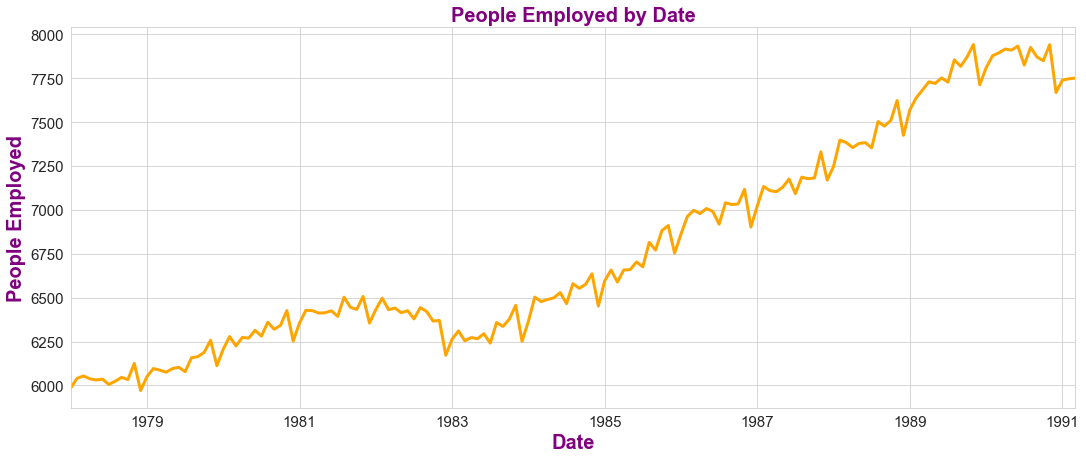

In [159]:
ae.plot(figsize = (18, 7), color = "orange", linewidth = 3, legend = None)
plt.title("People Employed by Date", size = 20, color = "purple", weight = "bold")
plt.xlabel("Date", size = 20, color = "purple", weight = "bold")
plt.ylabel("People Employed", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [160]:
# Take the first and seasonal differences and drop NaNs
au_diff = ae.diff().diff(12).dropna()

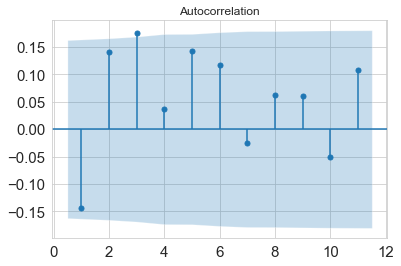

In [161]:
plot_acf(au_diff, lags = 11, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

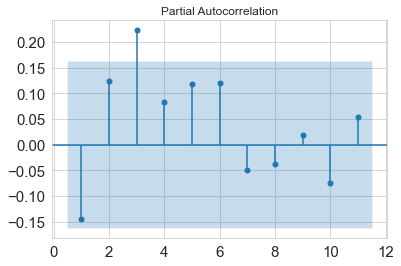

In [162]:
plot_pacf(au_diff, lags = 11, zero = False)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Automated Model Selection

In [163]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True,m=7,
                      d=0, 
                      D = 1, # Seasonal Differencing
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
                       
# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.699, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.585, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.418, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.870, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1125.340, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1120.007, Time=0.38 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.898, Time=0.63 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1121.058, Time=0.33 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1119.151, Time=0.35 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.433, Time=0.18 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.903, Time=0.64 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1120.149, Time=0.17 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1120.015, Time=0.55 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : 

In [164]:
# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False,  # No Seasonality
                      d=1,             # No seasonal differencing
                      trend='c',       # Trend Constant
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1131.956, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1153.963, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.355, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1155.747, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1153.963, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1136.103, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1130.992, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.020, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1132.526, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1130.992, Time=0.13 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 1.530 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(2, 1, 1)   Log Likelihood        

### SARIMA model diagnostics

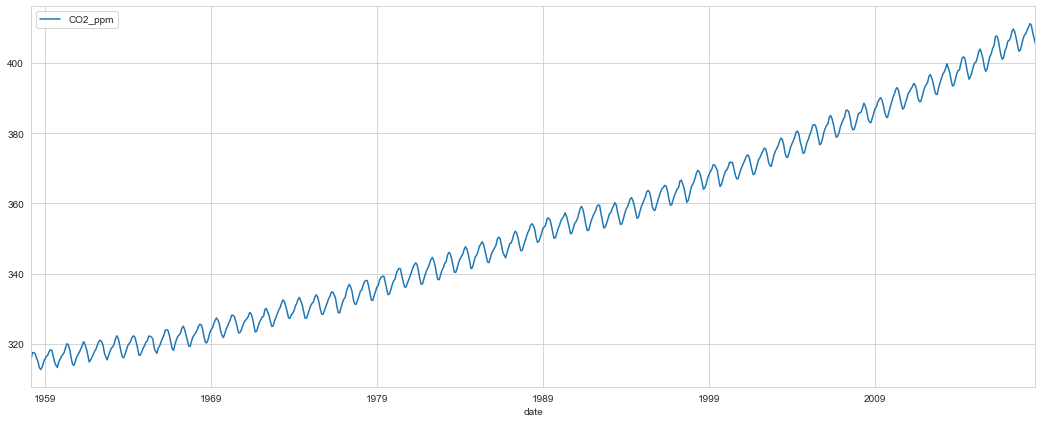

In [165]:
co2 = pd.read_csv("co2.csv", index_col = "date", parse_dates = ["date"])
co2.plot(figsize = (18, 7))
plt.show()

In [166]:
# Create model object
model = SARIMAX(co2, 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                trend="c")
# Fit model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Sat, 30 Apr 2022   AIC                            369.437
Time:                                    23:30:21   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2413      0.078      3.075      0.002       0.088       0.395
ma.L1         -0.6081      0.065     -9.298      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.499      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.749      0.000       0.086       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

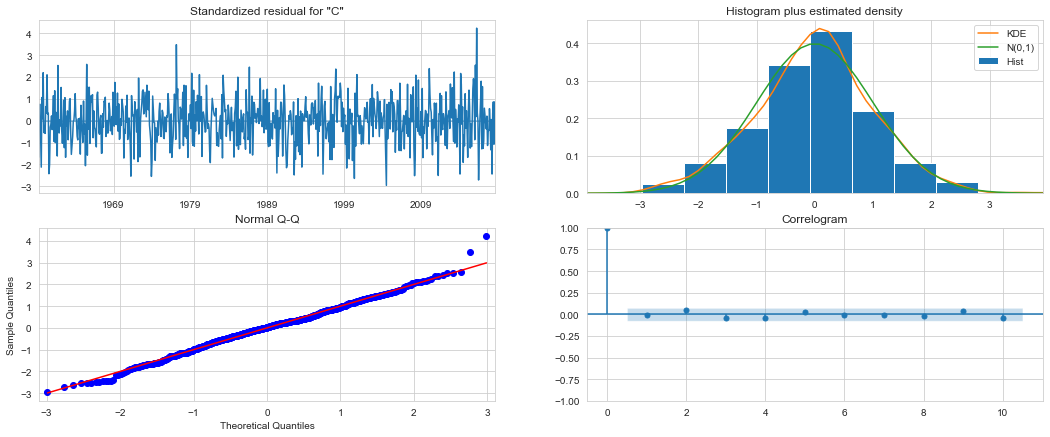

In [167]:
results.plot_diagnostics(figsize = (18, 7))
plt.show()

In [168]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

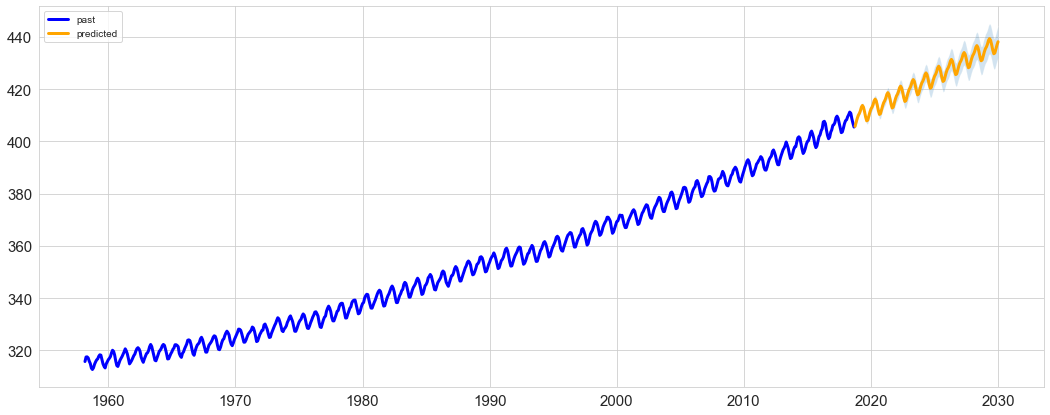

In [169]:
plt.figure(figsize = (18, 7))

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past', linewidth = 3, color = "blue")

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted', linewidth = 3, color = "orange")

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)
plt.xticks(size = 15)
plt.yticks(size = 15)
# Plot legend and show figure
plt.legend()
plt.show()